In [1]:
import numpy as np
import matplotlib.pyplot as plt

from NanTex_backend.Util.pyDialogue import pyDialogue as pD
from NanTex_backend.data_preparation.overlay_generation import OverlayGenerator

In [2]:
## setup
OLGen:OverlayGenerator
OLGen = OverlayGenerator.from_explorer(
                data_path_out = None, 
                mode = 'rotation', 
                data_type = 'npy',
                multi_core = True,
                DEBUG = True)

Please select files for feature #1...
Please select files for feature #2...
Please select files for feature #3...
Please select files for feature #4...
No more features to select...
Loading data...
Loading npy data...
Setting up metadata...
Checking outpath...
Retrieving outpath...


In [5]:
OLGen.mode = 'rotation'
OLGen.multi_core = True
OLGen.metadata['sleeptime'] = 0.0
OLGen.setup_multi_core(num_cpu=16,
                       num_gpu=0,
                       launch_dashboard=True)

Setting up Ray...


2024-10-07 12:21:00,292	INFO worker.py:1777 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Ray setup complete...
Ray Dashboard: 127.0.0.1:8265


In [6]:
OLGen.generate_overlay(patchsize=(512,512),
                       max_val=255)

Padding input images...
Normalizing input images...
Generating punchcards...
Generating overlay...
Checking Ray Status...
Offloading data_in to Ray...
Offloading punchcards to Ray...
Offloading data_outpath to Ray...


Scheduling Workers:   0%|          | 0/512 [00:00<?, ?it/s]

Setting up progress monitors...


Workers:   0%|          | 0/512 [00:00<?, ?it/s]

CPU usage:   0%|          |

RAM usage:   0%|          |

Listening to Ray Progress...
Ray Progress Complete...
Multi Core Execution Complete...
Use 'OverlayGenerator.shutdown_multi_core()' to shutdown the cluster.


In [7]:
OLGen.shutdown_multi_core()

Shutting down Ray...


{'x_lim': 6541, 'y_lim': 6541}
C:/Users/belav/Documents/GitHub/NanTex/test_out
{'feature_1': ['C:/Users/belav/Documents/GitHub/NanTex/test_in/CLA_train/CLA_0_cut.npy', 'C:/Users/belav/Documents/GitHub/NanTex/test_in/CLA_train/CLA_1_cut.npy'], 'feature_2': ['C:/Users/belav/Documents/GitHub/NanTex/test_in/MIC_train/MIC_0_cut.npy', 'C:/Users/belav/Documents/GitHub/NanTex/test_in/MIC_train/MIC_1_cut.npy']}


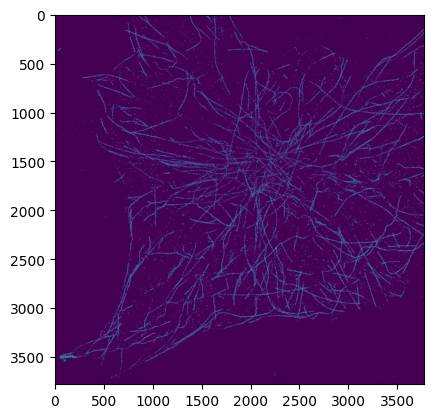

In [3]:
## checking the setup
print(OLGen.metadata)
print(OLGen.data_path_out)
print(OLGen.data_paths_in)

plt.imshow(OLGen.data_in['feature_2'][0])

In [4]:
## Punchcard generation
OLGen.generate_punchcards()
OLGen.data_punchcards

Generating punchcards...


{'2_feature_overlay_(0, 0)': {'feature_1': 0, 'feature_2': 0},
 '2_feature_overlay_(0, 1)': {'feature_1': 0, 'feature_2': 1},
 '2_feature_overlay_(1, 0)': {'feature_1': 1, 'feature_2': 0},
 '2_feature_overlay_(1, 1)': {'feature_1': 1, 'feature_2': 1}}

In [8]:
OLGen.data_paths_in

{'feature_1': ['C:/Users/belav/Documents/GitHub/NanTex/test_in/CLA_train/CLA_0_cut.npy',
  'C:/Users/belav/Documents/GitHub/NanTex/test_in/CLA_train/CLA_1_cut.npy'],
 'feature_2': ['C:/Users/belav/Documents/GitHub/NanTex/test_in/MIC_train/MIC_0_cut.npy',
  'C:/Users/belav/Documents/GitHub/NanTex/test_in/MIC_train/MIC_1_cut.npy']}

In [7]:
## Punchcard generation
OLGen.mode = 'overlay'
OLGen.multi_core = False
OLGen.generate_punchcards()
OLGen.data_punchcards

Generating punchcards...


{'2_feature_overlay_(0, 0)': {'feature_1': 0, 'feature_2': 0},
 '2_feature_overlay_(0, 1)': {'feature_1': 0, 'feature_2': 1},
 '2_feature_overlay_(1, 0)': {'feature_1': 1, 'feature_2': 0},
 '2_feature_overlay_(1, 1)': {'feature_1': 1, 'feature_2': 1}}

In [8]:
## Generate output
OLGen.mode = 'rotation'
OLGen.generate_punchcards()
OLGen.generate_overlay(patchsize=(256,256))

Generating punchcards...
Padding input images...
Normalizing input images...
Generating punchcards...
Generating overlay...


Generating Single Core Rotational Overlays...:   0%|          | 0/64 [00:00<?, ?it/s]

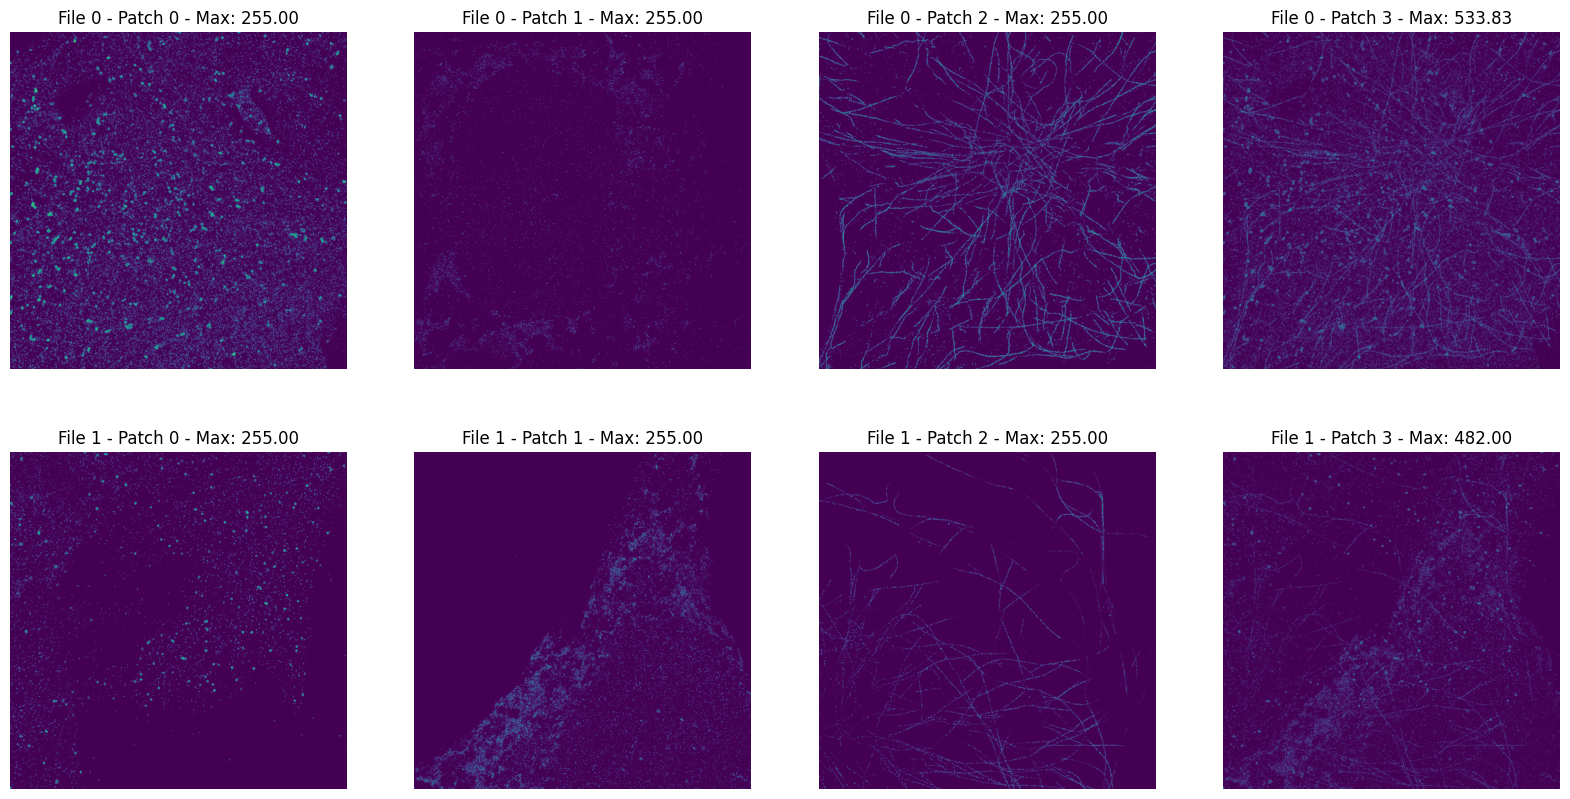

In [7]:
## Data Inspector
files:list = pD.askFILES()
files = [np.load(f) for f in files]

# fig, axs = plt.subplots(1, len(files), figsize=(20, 10))
# for i, f in enumerate(files):
#     axs[i].imshow(f[0])

fig, axs = plt.subplots(len(files), files[0].shape[0], figsize=(20, 10))
for j,file in enumerate(files):
    for i in range(files[0].shape[0]):
        axs[j,i].imshow(file[i])
        axs[j,i].axis('off')
        axs[j,i].set_title(f'File {j} - Patch {i} - Max: {np.max(file[i]):.2f}')